# Ejercicios previos al segundo examen parcial. 

## Alvarado Morán Óscar Anuar.

In [1]:
from threading import Thread, BoundedSemaphore, Lock
from queue import Queue
from random import randint
import time
import sys
import numpy as np
import matplotlib.pyplot as plt

#Thread-safe print
def sprint(s):
    sys.stdout.write(s + '\n')

In [2]:
# Implementando con Lock
class Mutex:
    def __init__(self):
        self.esta_bloqueado = False
        self.lock = Lock()
    
    def bloquear(self):
        self.lock.acquire()
        self.esta_bloqueado = True
    
    def desbloquear(self):
        self.lock.release()
        self.esta_bloqueado = False

# Ejercicio 1.- Productor - consumidor: 
1 productor, 2 consumidores. Usar MUTEX

In [3]:
class Productor(Thread):
    def __init__(self,buffer,mutex):
        super().__init__()
        self.buffer = buffer
        self.mutex = mutex
        self.esta_despierto = False
        
    def producir(self):
        item = randint(0,101)
        print(f'Productor: Acabo de producir {item}')
        return item
    
    def añadir_al_buffer(self,item):
        self.buffer.put(item)
        print(f'Productor: Agregué {item} al buffer')
    
    def run(self):
        while True:
            self.mutex.bloquear()
            if not self.buffer.full():
                print(f'Productor: Hay espacio para nuevos items')
                item = self.producir()
                # Sección crítica
                self.añadir_al_buffer(item)
            self.mutex.desbloquear()

In [4]:
class Consumidor(Thread):
    def __init__(self,buffer,mutex, nombre, tiempo_dormir):
        super().__init__()
        self.buffer = buffer
        self.mutex = mutex
        self.esta_despierto = False
        self.dormir = tiempo_dormir
        self.nombre = nombre
        
    def quitar_del_buffer(self):
        item = self.buffer.get()
        print(f'Consumidor {self.nombre}: Obtuve {item} del buffer')
        return item
    
    def consumir(self,item):
        print(f'Consumidor {self.nombre}: Consumí {item}')
    
    def run(self):
        while True:
            with self.mutex:
                if not self.buffer.empty():
                    time.sleep(self.dormir)
                    sprint(f'Consumidor {self.nombre}: Hay items por consumir')
                    # Sección crítica
                    item = self.quitar_del_buffer()
                    ##
                    self.consumir(item)        

In [5]:
mutex = Mutex()
buffer = Queue(50) # Tamaño del buffer

p = Productor(buffer,mutex)
c1 = Consumidor(buffer,mutex, 'Oscar', 0)
c2 = Consumidor(buffer,mutex, 'Dante', 0)

p.start()
c1.start()
c2.start()

p.join()
c1.join()
c2.join()

Productor: Hay espacio para nuevos items
Productor: Acabo de producir 62
Productor: Agregué 62 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 12
Productor: Agregué 12 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 88
Productor: Agregué 88 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 6
Productor: Agregué 6 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 66
Productor: Agregué 66 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 39
Productor: Agregué 39 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 83
Productor: Agregué 83 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 62
Productor: Agregué 62 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo de producir 53
Productor: Agregué 53 al buffer
Productor: Hay espacio para nuevos items
Productor: Acabo

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/alumno/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "<ipython-input-4-fd0d8cf35579>", line 20, in run
    with self.mutex:
AttributeError: __enter__

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/alumno/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "<ipython-input-4-fd0d8cf35579>", line 20, in run
    with self.mutex:
AttributeError: __enter__

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/alumno/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-eb4056d422ca>", line 12, in <module>
    p.join()
  File "/home/alumno/anaconda3/lib/python3.7/threading.py", line 1032, in join
    self._wait_for_tstate_lock()
  File "/home/alumno/anaconda3/lib/python3.7/threading.py", line 1048, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alumno/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  Fi

KeyboardInterrupt: 

# Ejercicio 2.- Composición de funciones: 
$f(g(x))$, $x \epsilon [-100, 100]$,  $\Delta x = 0.25$ con 2 hilos:
- Thread 1: $g(x) = 3x^{2} + 2x - 1$
- Thread 2: $f(x) = sin(g(x)) + cos(g(x))$

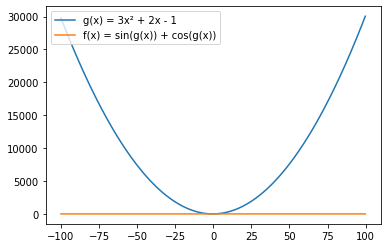

g(x) = [ 2.97990000e+04  2.96496875e+04  2.95007500e+04  2.93521875e+04
  2.92040000e+04  2.90561875e+04  2.89087500e+04  2.87616875e+04
  2.86150000e+04  2.84686875e+04  2.83227500e+04  2.81771875e+04
  2.80320000e+04  2.78871875e+04  2.77427500e+04  2.75986875e+04
  2.74550000e+04  2.73116875e+04  2.71687500e+04  2.70261875e+04
  2.68840000e+04  2.67421875e+04  2.66007500e+04  2.64596875e+04
  2.63190000e+04  2.61786875e+04  2.60387500e+04  2.58991875e+04
  2.57600000e+04  2.56211875e+04  2.54827500e+04  2.53446875e+04
  2.52070000e+04  2.50696875e+04  2.49327500e+04  2.47961875e+04
  2.46600000e+04  2.45241875e+04  2.43887500e+04  2.42536875e+04
  2.41190000e+04  2.39846875e+04  2.38507500e+04  2.37171875e+04
  2.35840000e+04  2.34511875e+04  2.33187500e+04  2.31866875e+04
  2.30550000e+04  2.29236875e+04  2.27927500e+04  2.26621875e+04
  2.25320000e+04  2.24021875e+04  2.22727500e+04  2.21436875e+04
  2.20150000e+04  2.18866875e+04  2.17587500e+04  2.16311875e+04
  2.15040000e+04  

f(x) = [-1.38364886  0.17131127  1.29723875 -1.24240172  0.72720773 -0.52777043
  0.79829139 -1.31404138  1.17613928  0.4985501  -1.23642963 -1.21122873
 -0.49043994 -0.07761862 -0.1842759  -0.77672123 -1.39533054 -0.7193593
  1.2211458   0.20952036 -1.16217513  1.39490516 -1.4072042   1.29769524
 -0.65036044 -0.77657872  1.27667358  0.89261055 -0.38315593 -1.06877881
 -1.23659514 -1.10482361 -0.49031268  0.75542673  1.35704601 -0.52729578
 -0.92924497  1.40230814 -1.38038371  1.3879063  -1.38378974  0.78329851
  0.75596417 -1.22787156 -1.06186185  0.02299535  0.68651961  0.82455743
  0.50227382 -0.37899347 -1.35512106 -0.64866605  1.35600383 -0.38495817
 -0.49357643  0.8144599  -0.67293858  0.00441149  1.0760571  -1.21538917
 -0.77937596  0.75732311  1.37635945  1.39456214  1.38857781  1.39603481
  0.89372548 -0.57294852 -1.34128859  0.80196129  0.43470234 -1.0651044
  1.20373781 -1.02292969  0.31412142  0.94901202 -1.24146521 -0.84258942
  0.57500304  1.26080375  1.3954402   1.376603

In [8]:
def f(mutex):
    global x
    mutex.bloquear()
    f = np.sin(x) + np.cos(x)
    time.sleep(5)
    mutex.desbloquear()
    x = f
    print(f"f(x) = {x}")
    p2, = plt.plot(np.arange(-100,100, 0.25), x, label = "f(x) = sin(g(x)) + cos(g(x))")
    plt.legend(handles = [p2])
        
def g(mutex):
    global x
    mutex.bloquear()
    g = 3 * (x ** 2) + 2*x - 1
    time.sleep(5)
    mutex.desbloquear()
    x = g
    print(f"g(x) = {x}")
    p1, = plt.plot(np.arange(-100,100, 0.25), x, label = "g(x) = 3x² + 2x - 1")
    plt.legend(handles = [p1])
    
x = np.arange(-100,100, 0.25)
mutex = Mutex() 

thread1 = Thread(target = f, args = (mutex,))
thread2 = Thread(target = g, args = (mutex,))

thread2.start()
thread1.start()

plt.legend(loc = 'upper left')
plt.show()

# Ejercicio 3.-  Fábrica de dulces
Se tiene un proceso de fabricación de dulces: 

**Inicio**: Una máquina que provee chicles, una máquina que provee polvo para cubrir el chicle.

- Proceso 1: Máquina que recibe el chicle y el polvo. Cubre el chicle con el polvo.
- Proceso 2: Máquina que recibe el bolichicle y lo envuelve.
- Proceso 3: Máquina que toma 10 bolichicles envueltos para envasarlos de 10 en una bolsa.

**Simula el proceso de fabricación dando tiempos para cada proceso  y sincronizando cada uno.**

*Le damos un stock específico para qeu tenga un alto, una vez que pudo envasar de 10 en 10 todo el material que había en el stock, se detiene o al menos ya no puede entrar a ninguna acción de hilos.*

In [5]:
def p1(mutex, chicles, polvo, bolichicles):
    while True:
        if not chicles.empty():
            mutex.bloquear()
            c = chicles.get(1)
            p = polvo.get()
            print(f"1.- Recibo chicle {c} y polvo {p}.")
            time.sleep(1)
            mutex.desbloquear()
            mutex.bloquear()
            bolichicles.put([c, p])
            print(f"1.- Cubro el chicle {c} con polvo {p}. Lo paso a la máquina 2")
            mutex.desbloquear()
    
def p2(mutex, bolichicles, envueltos):
    while True:
        if not bolichicles.empty():
            mutex.bloquear()
            b = bolichicles.get()
            print(f"2.- Recibo el bolichicle {b}.")
            mutex.desbloquear()
            mutex.bloquear()
            envueltos.put(b)
            print(f"2.- Envuelvo el bolichicle {b}. Lo paso a la máquina 3")
            mutex.desbloquear()

def p3(mutex, envueltos, envasados):
    while True:
        if envueltos.qsize() >= 10:
            
            mutex.bloquear()
            for i in range(10):
                env = envueltos.get()
                envasados.put(env)
            print("---------------------------------------------")
            print("3.-Tomé 10 bolichicles envueltos y los envasé.")
            print("---------------------------------------------")
            mutex.desbloquear()
    
mutex = Mutex()
stock = 20
Queue_chicles = Queue(stock)
Queue_polvo = Queue(stock)

for i in range(stock):
    Queue_chicles.put(round(np.random.rand(1)[0],3))
    Queue_polvo.put(round(np.random.rand(1)[0],3))

Queue_bolichicles = Queue(stock)
Queue_envueltos = Queue(stock)
Queue_envasados = Queue(stock)
    
maquina1 = Thread(target = p1, args = (mutex, Queue_chicles, Queue_polvo, Queue_bolichicles))
maquina2 = Thread(target = p2, args = (mutex,Queue_bolichicles, Queue_envueltos))
maquina3 = Thread(target = p3, args = (mutex,Queue_envueltos, Queue_envasados))

maquina1.start()
maquina2.start()
maquina3.start()

1.- Recibo chicle 0.032 y polvo 0.524.
1.- Cubro el chicle 0.032 con polvo 0.524. Lo paso a la máquina 2
1.- Recibo chicle 0.77 y polvo 0.907.
1.- Cubro el chicle 0.77 con polvo 0.907. Lo paso a la máquina 2
1.- Recibo chicle 0.545 y polvo 0.542.
1.- Cubro el chicle 0.545 con polvo 0.542. Lo paso a la máquina 2
2.- Recibo el bolichicle [0.032, 0.524].
2.- Envuelvo el bolichicle [0.032, 0.524]. Lo paso a la máquina 3
1.- Recibo chicle 0.173 y polvo 0.311.
1.- Cubro el chicle 0.173 con polvo 0.311. Lo paso a la máquina 2
1.- Recibo chicle 0.557 y polvo 0.977.
1.- Cubro el chicle 0.557 con polvo 0.977. Lo paso a la máquina 2
1.- Recibo chicle 0.149 y polvo 0.568.
1.- Cubro el chicle 0.149 con polvo 0.568. Lo paso a la máquina 2
1.- Recibo chicle 0.732 y polvo 0.787.
2.- Recibo el bolichicle [0.77, 0.907].
2.- Envuelvo el bolichicle [0.77, 0.907]. Lo paso a la máquina 3
2.- Recibo el bolichicle [0.545, 0.542].
2.- Envuelvo el bolichicle [0.545, 0.542]. Lo paso a la máquina 3
2.- Recibo el 